**Importing Correct Files/Features**

Below shows importing the expected libraries and then the data files. 

Data files are merged on the 'SEQN' number (basically a unique identifier for each individual that took part)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir_1 = '/workspaces/Final-Year-Project/Data/2023/'

nhanes_files_variables = {
    'BMX_L.XPT': ['SEQN', 'BMXWAIST', 'BMXWT', 'BMXBMI', 'BMXARMC', 'BMXHIP'],
    'BPQ_L.XPT': ['SEQN', 'BPQ150', 'BPQ101D', 'BPQ020', 'BPQ080'],
    'FNQ_L.XPT': ['SEQN', 'FNQ440'],
    'HUQ_L.XPT': ['SEQN', 'HUQ010'],
    'MCQ_L.XPT': ['SEQN', 'MCQ160A'],
    'PAQ_L.XPT': ['SEQN', 'PAD810Q'],
    'SMQ_L.XPT': ['SEQN', 'SMD630', 'SMD641'],
    'WHQ_L.XPT': ['SEQN', 'WHD020', 'WHD050'],
    'DEMO_L.XPT': ['SEQN', 'DMDYRUSR', 'RIDAGEYR'],
    'GHB_L.XPT': ['SEQN', 'LBXGH'],
    'GLU_L.xpt': ['SEQN', 'LBXGLU'],
}

data_frames = {}

for file_name, features in nhanes_files_variables.items():

    file_path = data_dir_1 + file_name
    
    df = pd.read_sas(file_path)
    
    df = df[features]
    
    data_frames[file_name] = df

merged_df = data_frames['BMX_L.XPT']

for file_name, df in data_frames.items():
    if file_name != 'BMX_L.XPT':
        merged_df = pd.merge(merged_df, df, on='SEQN', how='outer')

# Display info
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11933 non-null  float64
 1   BMXWAIST  8190 non-null   float64
 2   BMXWT     8754 non-null   float64
 3   BMXBMI    8471 non-null   float64
 4   BMXARMC   8562 non-null   float64
 5   BMXHIP    6776 non-null   float64
 6   BPQ150    2969 non-null   float64
 7   BPQ101D   8498 non-null   float64
 8   BPQ020    8498 non-null   float64
 9   BPQ080    8498 non-null   float64
 10  FNQ440    8142 non-null   float64
 11  HUQ010    11933 non-null  float64
 12  MCQ160A   7807 non-null   float64
 13  PAD810Q   8139 non-null   float64
 14  SMD630    23 non-null     float64
 15  SMD641    273 non-null    float64
 16  WHD020    8486 non-null   float64
 17  WHD050    8486 non-null   float64
 18  DMDYRUSR  1875 non-null   float64
 19  RIDAGEYR  11933 non-null  float64
 20  LBXGH     6715 non-null   fl

In [2]:
merged_df_cleaned = merged_df.dropna(subset=['LBXGH', 'LBXGLU'], how='all')

def categorize_diabetes(row):
    if (pd.notnull(row['LBXGH']) and row['LBXGH'] >= 6.5) or (pd.notnull(row['LBXGLU']) and row['LBXGLU'] >= 126):
        return 2
    
    elif (pd.notnull(row['LBXGH']) and 5.7 <= row['LBXGH'] < 6.5) or (pd.notnull(row['LBXGLU']) and 100 <= row['LBXGLU'] < 126):
        return 1
    else:
        return 0

# Apply the function to create the new 'Diabetes Status' column
merged_df_cleaned['Diabetes Status'] = merged_df_cleaned.apply(categorize_diabetes, axis=1)

# Drop the HbA1c (LBXGH) and FPG (LBXGLU) columns
merged_df_cleaned = merged_df_cleaned.drop(columns=['LBXGH', 'LBXGLU'])

# Display the info of the final dataframe
df = merged_df_cleaned
df.info()

# Display the first few rows to confirm
print(df.head())



<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 11932
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             6717 non-null   float64
 1   BMXWAIST         6418 non-null   float64
 2   BMXWT            6640 non-null   float64
 3   BMXBMI           6626 non-null   float64
 4   BMXARMC          6548 non-null   float64
 5   BMXHIP           6364 non-null   float64
 6   BPQ150           2214 non-null   float64
 7   BPQ101D          6243 non-null   float64
 8   BPQ020           6243 non-null   float64
 9   BPQ080           6243 non-null   float64
 10  FNQ440           6002 non-null   float64
 11  HUQ010           6717 non-null   float64
 12  MCQ160A          5768 non-null   float64
 13  PAD810Q          5997 non-null   float64
 14  SMD630           22 non-null     float64
 15  SMD641           199 non-null    float64
 16  WHD020           6243 non-null   float64
 17  WHD050           6

/tmp/ipykernel_1244/2240555405.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['Diabetes Status'] = merged_df_cleaned.apply(categorize_diabetes, axis=1)


In [3]:
missing_percentage = df.isnull().mean() * 100

columns_to_drop = missing_percentage[missing_percentage > 30].index

df = df.drop(columns=columns_to_drop)

df = df.dropna()

df.info()





<class 'pandas.core.frame.DataFrame'>
Index: 5416 entries, 0 to 11932
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             5416 non-null   float64
 1   BMXWAIST         5416 non-null   float64
 2   BMXWT            5416 non-null   float64
 3   BMXBMI           5416 non-null   float64
 4   BMXARMC          5416 non-null   float64
 5   BMXHIP           5416 non-null   float64
 6   BPQ101D          5416 non-null   float64
 7   BPQ020           5416 non-null   float64
 8   BPQ080           5416 non-null   float64
 9   FNQ440           5416 non-null   float64
 10  HUQ010           5416 non-null   float64
 11  MCQ160A          5416 non-null   float64
 12  PAD810Q          5416 non-null   float64
 13  WHD020           5416 non-null   float64
 14  WHD050           5416 non-null   float64
 15  RIDAGEYR         5416 non-null   float64
 16  Diabetes Status  5416 non-null   int64  
dtypes: float64(16), in

In [4]:
df['Diabetes Status'].value_counts()

Diabetes Status
0    2521
1    2136
2     759
Name: count, dtype: int64

<Axes: >

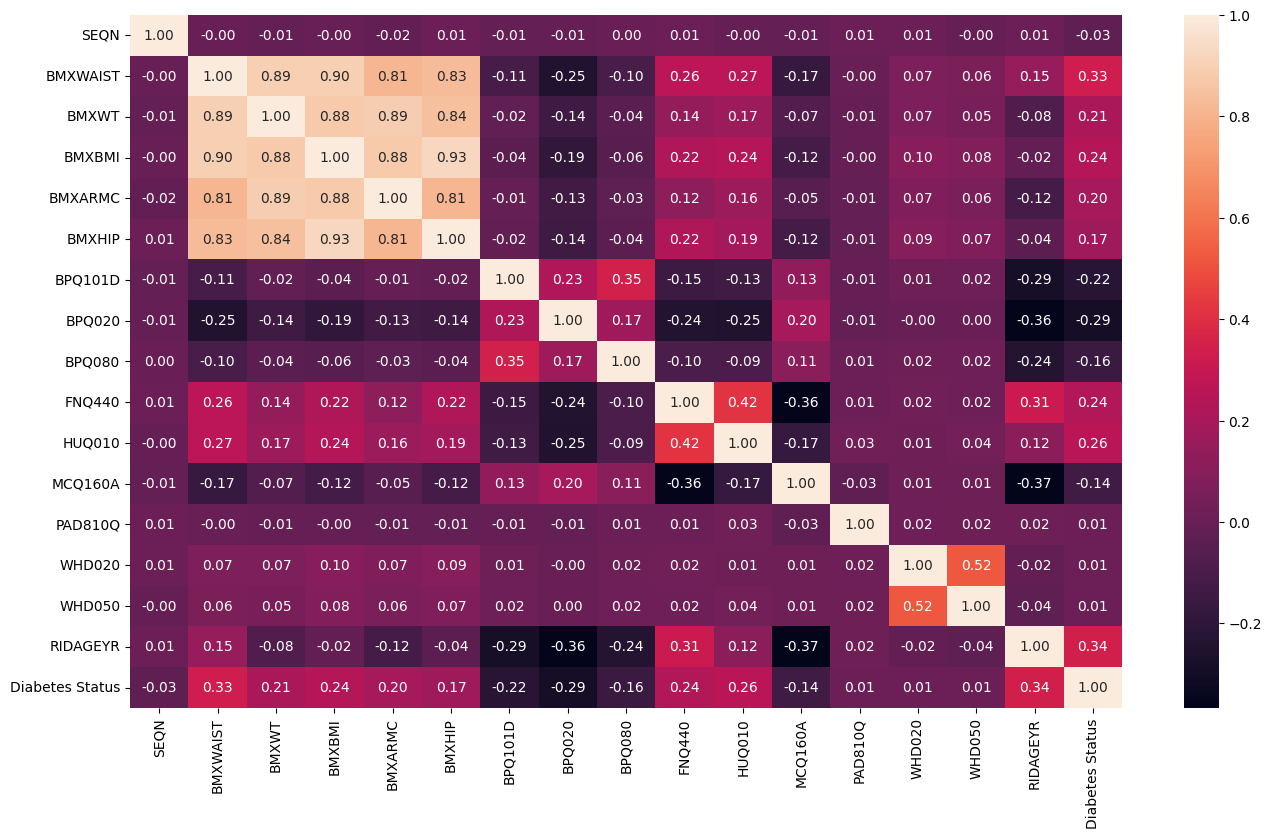

In [5]:
plt.figure(figsize=(16, 9))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")


**REMOVE 'SMAQUEX2' - It regards the age when taking the smoking questions**  

In [6]:
from sklearn.utils import resample
import os

# Separate each class into different DataFrames
no_diabetes = df[df['Diabetes Status'] == 0]
prediabetes = df[df['Diabetes Status'] == 1]
diabetes = df[df['Diabetes Status'] == 2]

# Downsample No Diabetes and Prediabetes classes to match the Diabetes count
no_diabetes_downsampled = resample(no_diabetes, replace=False, n_samples=len(diabetes), random_state=42)
prediabetes_downsampled = resample(prediabetes, replace=False, n_samples=len(diabetes), random_state=42)

# Combine all classes to create a balanced dataset
df_balanced = pd.concat([no_diabetes_downsampled, prediabetes_downsampled, diabetes])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the path for saving
data_dir = '/workspaces/Final-Year-Project/Data/Cleaned and Downsampled Data'
output_file = os.path.join(data_dir, 'CleanedDownsampledDF.csv')

# Save the balanced dataset to a CSV file
df_balanced.to_csv(output_file, index=False)

# Check the class distribution after downsampling
print("Class distribution after downsampling:")
print(df_balanced['Diabetes Status'].value_counts())
print(f"Dataset saved to {output_file}")

Class distribution after downsampling:
Diabetes Status
1    759
0    759
2    759
Name: count, dtype: int64
Dataset saved to /workspaces/Final-Year-Project/Data/Cleaned and Downsampled Data/CleanedDownsampledDF.csv


<Axes: >

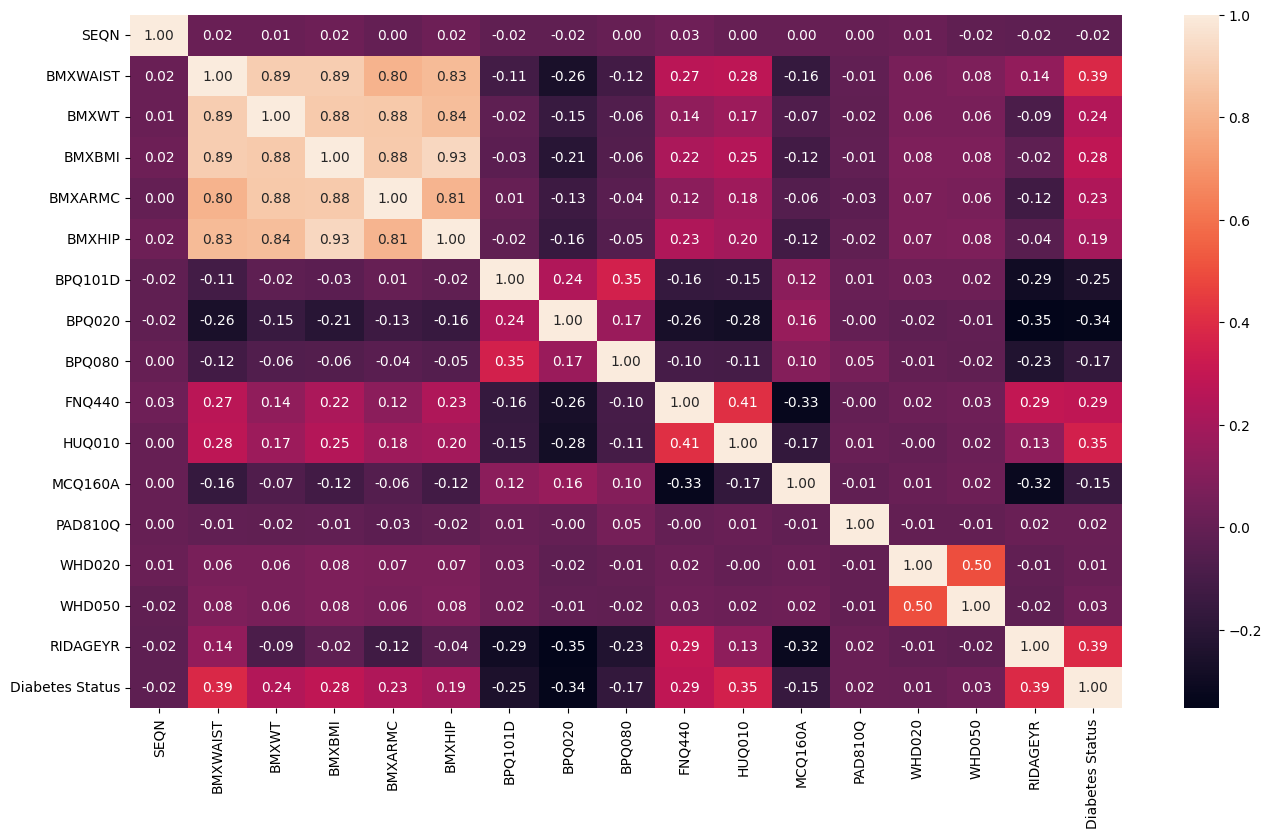

In [7]:
df = pd.read_csv('/workspaces/Final-Year-Project/Data/Cleaned and Downsampled Data/CleanedDownsampledDF.csv')

plt.figure(figsize=(16, 9))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

In [8]:
df_corr = df.corr() 
df_top = df_corr['Diabetes Status'].abs().sort_values(ascending=False)

df_top

Diabetes Status    1.000000
RIDAGEYR           0.390636
BMXWAIST           0.385766
HUQ010             0.349968
BPQ020             0.341805
FNQ440             0.285940
BMXBMI             0.282511
BPQ101D            0.249577
BMXWT              0.242390
BMXARMC            0.228409
BMXHIP             0.193164
BPQ080             0.170048
MCQ160A            0.154524
WHD050             0.028021
SEQN               0.023165
PAD810Q            0.015135
WHD020             0.010013
Name: Diabetes Status, dtype: float64